In [358]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Conv2DTranspose, LeakyReLU, Flatten, Reshape

In [359]:
dataset = tf.keras.datasets.mnist.load_data()

In [360]:
(x_train, y_train), (x_test, y_test) = dataset

In [361]:
def display_image(image_tensor):
    plt.imshow(image_tensor)
    plt.show()
    pass

def rescale_dataset(image, label):
    return image/255, label/255.

In [362]:
x_train = tf.constant(x_train, dtype = tf.float32)

In [363]:
x_train = tf.expand_dims(x_train, axis = -1)
x_train = tf.data.Dataset.from_tensor_slices((x_train, x_train))
x_train = x_train.map(rescale_dataset)

In [364]:
x_train = x_train.batch(batch_size=32)

In [365]:
#Build the auto encoder
encoder_model = tf.keras.models.Sequential([
    #Encoder
    Input(shape = (28, 28, 1)),
    Conv2D(filters = 4, kernel_size = (3,3), strides = (2,2), activation = LeakyReLU(), padding = 'same'),
    Conv2D(filters = 8, kernel_size = (3,3), strides = (2,2), activation = LeakyReLU(), padding = 'same'),
    Flatten(),
    Dense(units = 100, activation = LeakyReLU()),
    #Encoder layer
    Dense(units = 3, activation = LeakyReLU())
])


In [366]:
decoder_model = tf.keras.models.Sequential([
    Input(shape = [3]),
    Dense(units = 7*7*8, activation = LeakyReLU()),
    Reshape(target_shape = (7, 7, 8)),
    Conv2DTranspose(filters = 8, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = LeakyReLU()),
    Conv2DTranspose(filters = 4, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = LeakyReLU()),
    Conv2DTranspose(filters = 1, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'sigmoid')
])

In [367]:
auto_encoder = tf.keras.models.Sequential([encoder_model, decoder_model])

In [368]:
auto_encoder.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])

In [369]:
auto_encoder.fit(x_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0884 - accuracy: 0.7995
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0612 - accuracy: 0.7957
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0539 - accuracy: 0.7933
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0512 - accuracy: 0.7949
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0501 - accuracy: 0.7959


In [370]:
x_test = tf.cast(x_test, tf.float32)
x_test = x_test/255

In [371]:
index = 0
def get_vector_and_label(image_index):
    image_tensor = x_test[image_index]
    image_label = y_test[image_index]
    input_to_network = tf.expand_dims(image_tensor, axis = 0)
    encoded_vector = encoder_model(input_to_network)
    return encoded_vector, image_tensor, image_label

In [372]:
def get_list_vectors(class_label, limit):
    vector_list = []

    for index in range(x_test.shape[0]):
        if len(vector_list) >= limit:
            break
        encoded_vector, image_tensor, image_label = get_vector_and_label(index)
        if image_label == class_label:
            vector_list.append(encoded_vector)
        else:
            continue
        pass
    return vector_list

In [373]:
def plot_list_of_vectors(encoded_vector_list1, encoded_vector_list2):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection= '3d')
    for encoded_vector1, encoded_vector2 in zip(encoded_vector_list1, encoded_vector_list2):
        ax.scatter(encoded_vector1[0][0], encoded_vector1[0][1], encoded_vector1[0][2], c='blue')
        ax.scatter(encoded_vector2[0][0], encoded_vector2[0][1], encoded_vector2[0][2], c='red')
        pass
    plt.show()


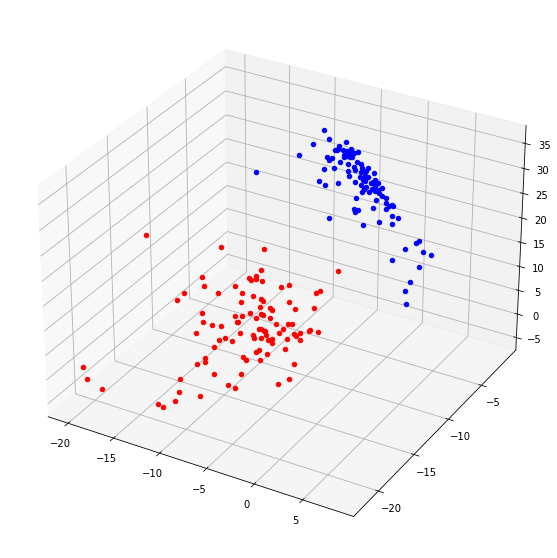

In [376]:
vector_list1 = get_list_vectors(class_label = 1, limit = 100)
vector_list2 = get_list_vectors(class_label = 0, limit = 100)
plot_list_of_vectors(vector_list1, vector_list2)